
AtliQ Hotels Data Analysis Project

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
df_bookings = pd.read_csv("drive/My Drive/datasets/fact_bookings.csv")

In [5]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [6]:
df_bookings.shape

(134590, 12)

In [7]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [8]:
booking_platforms = df_bookings.booking_platform.unique()
booking_platforms

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [9]:
booking_platforms = df_bookings.booking_platform.value_counts()
booking_platforms

,count
booking_platform,
others,55066
makeyourtrip,26898
logtrip,14756
direct online,13379
tripster,9630
journey,8106
direct offline,6755


<Axes: xlabel='booking_platform'>

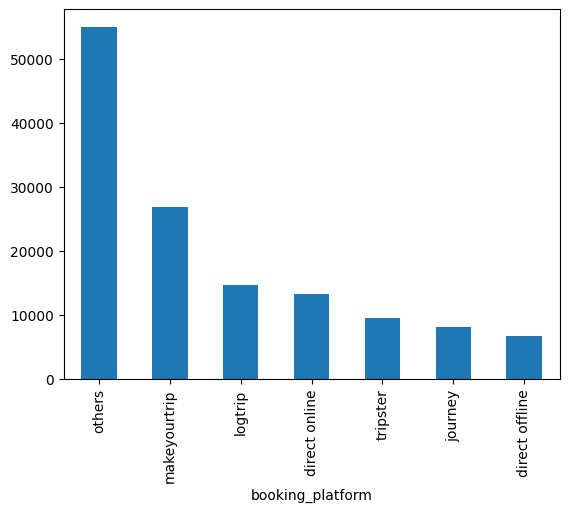

In [10]:
df_bookings.booking_platform.value_counts().plot(kind='bar')

<Axes: ylabel='booking_platform'>

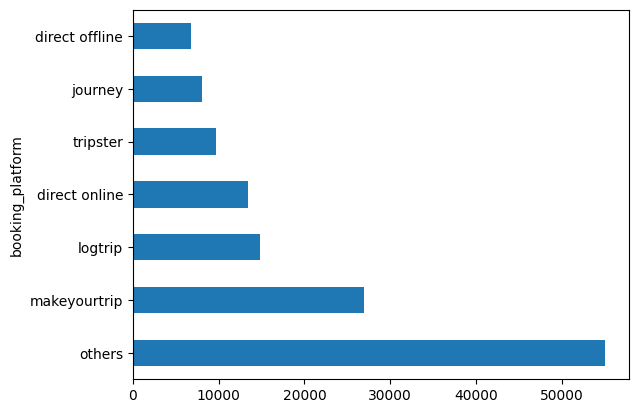

In [11]:
df_bookings.booking_platform.value_counts().plot(kind='barh')

In [12]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [13]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [14]:
df_date = pd.read_csv("drive/My Drive/datasets/dim_date.csv")
df_hotels = pd.read_csv("drive/My Drive/datasets/dim_hotels.csv")
df_rooms = pd.read_csv("drive/My Drive/datasets/dim_rooms.csv")
df_agg_bookings = pd.read_csv("drive/My Drive/datasets/fact_aggregated_bookings.csv")

In [15]:
entries_date = df_date.shape
entries_bookings = df_bookings.shape
entries_hotels = df_hotels.shape
entries_rooms = df_rooms.shape
entries_agg = df_agg_bookings.shape

In [16]:
entries_date, entries_bookings, entries_hotels, entries_rooms, entries_agg


((92, 4), (134590, 12), (25, 4), (4, 2), (9200, 5))

In [17]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [18]:
df_hotels.shape

(25, 4)

In [19]:
df_hotels.category.value_counts()

,count
category,
Luxury,16
Business,9


In [20]:
df_hotels.city.value_counts()

,count
city,
Mumbai,8
Hyderabad,6
Bangalore,6
Delhi,5


<Axes: xlabel='city'>

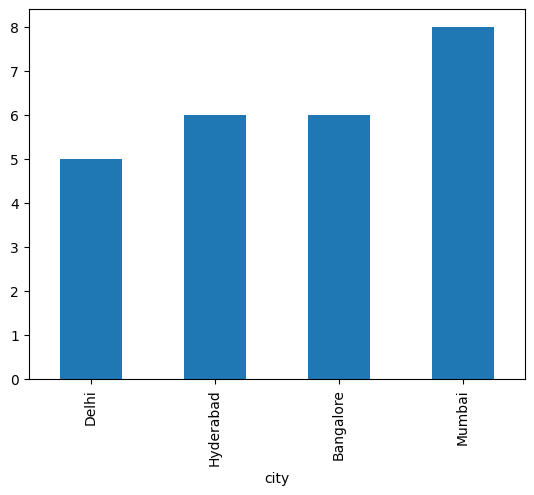

In [21]:
df_hotels.city.value_counts().sort_values(ascending=True).plot(kind='bar')

In [22]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [23]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [24]:
df_agg_bookings.groupby('property_id')['successful_bookings'].sum()

,successful_bookings
property_id,
16558,3153
16559,7338
16560,4693
16561,4418
16562,4820
16563,7211
17558,5053
17559,6142
17560,6013


In [25]:
df_agg_bookings[df_agg_bookings['successful_bookings'] > df_agg_bookings['capacity']]


,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [26]:
df_agg_bookings.capacity.max()

50.0

In [27]:
df_bookings.shape

(134590, 12)

In [28]:
no_of_guest = df_bookings[df_bookings.no_guests<=0]
no_of_guest

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [29]:
df_bookings = df_bookings[df_bookings.no_guests>0]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [30]:
df_bookings.shape

(134578, 12)

In [31]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


==> 2. Data Cleaning

In [32]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134578.000000,134578.000000,56679.000000,1.345780e+05,134578.000000
mean,18061.143315,2.036744,3.619048,1.537804e+04,12696.011822
std,1093.053454,1.031710,1.234970,9.304015e+04,6927.841641
min,16558.000000,1.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [33]:
df_bookings.shape

(134578, 12)

In [34]:
min, max = df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()
min, max

(6500, 28560000)

In [35]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
avg, std

(15378.036937686695, 93040.15493143328)

In [36]:
higher_limit = avg + 3*std
lower_limit = avg - 3*std
higher_limit, lower_limit

(294498.50173198653, -263742.4278566132)

In [37]:
df_bookings[df_bookings.revenue_generated<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [38]:
df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [39]:
df_bookings.shape


(134573, 12)

In [40]:
df_bookings.revenue_realized.describe()

,revenue_realized
count,134573.000000
mean,12695.983585
std,6927.791692
min,2600.000000
25%,7600.000000
50%,11700.000000
75%,15300.000000
max,45220.000000


In [41]:
df_bookings.isnull().sum()

,0
booking_id,0
property_id,0
booking_date,0
check_in_date,0
checkout_date,0
no_guests,0
room_category,0
booking_platform,0
ratings_given,77897
booking_status,0


In [42]:
df_agg_bookings.isnull().sum()

,0
property_id,0
check_in_date,0
room_category,0
successful_bookings,0
capacity,2


In [43]:
min, max = df_agg_bookings.capacity.min(), df_agg_bookings.capacity.max()
min, max

(3.0, 50.0)

In [44]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [45]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

<ipython-input-45-84eb537c0f2a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)


In [46]:
df_agg_bookings.isnull().sum()

,0
property_id,0
check_in_date,0
room_category,0
successful_bookings,0
capacity,0


In [47]:
df_agg_bookings.shape

(9200, 5)

In [48]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [49]:
df_agg_bookings.shape

(9200, 5)

In [50]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings.shape

(9194, 5)

In [51]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


==> 3. Data Transformation

In [52]:
df_agg_bookings['occ_pct'] = df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']

In [53]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000


In [54]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100,2))

In [55]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


==> 4. Insights Generation

1. What is an average occupancy rate in each of the room categories?

In [56]:
df_agg_bookings.groupby('room_category')['occ_pct'].mean().round(2)

,occ_pct
room_category,
RT1,57.89
RT2,58.01
RT3,58.03
RT4,59.28


In [57]:
df = pd.merge(df_agg_bookings, df_rooms, left_on='room_category', right_on='room_id', how='left')
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard


In [58]:
df.groupby('room_class')['occ_pct'].mean().round(2)

,occ_pct
room_class,
Elite,58.01
Premium,58.03
Presidential,59.28
Standard,57.89


In [59]:
df.drop('room_id', axis=1, inplace=True)
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard


2. Print average occupancy rate per city

In [60]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [61]:
df = pd.merge(df, df_hotels, left_on ='property_id', right_on = 'property_id')
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore


In [62]:
df.groupby('city')['occ_pct'].mean()

,occ_pct
city,
Bangalore,56.332376
Delhi,61.507341
Hyderabad,58.120652
Mumbai,57.909181


<Axes: xlabel='city'>

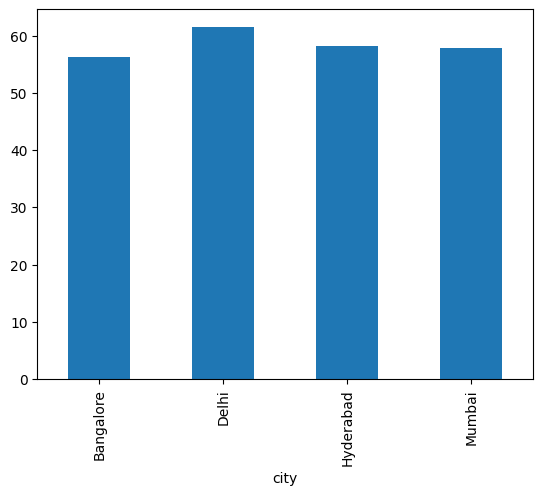

In [63]:
df.groupby('city')['occ_pct'].mean().plot(kind='bar')

3. When was the occupancy better? Weekday or Weekend?

In [64]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [65]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [66]:
df.groupby('day_type')['occ_pct'].mean()

,occ_pct
day_type,
weekeday,50.883140
weekend,72.343625


4: In the month of June, what is the occupancy for different cities

In [67]:
df['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [68]:
df_june_22 = df[df['mmm yy']=='Jun 22']
df_june_22.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday


In [69]:
df_june_22.groupby('city')['occ_pct'].mean()

,occ_pct
city,
Bangalore,56.436143
Delhi,62.474286
Hyderabad,58.458075
Mumbai,58.382560


5: We got new data for the month of august. Append that to existing data

In [70]:
df_august = pd.read_csv("drive/My Drive/datasets/new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [71]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [72]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [73]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis=0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6494,17558,31-Jul-22,RT4,3,6.0,50.0,Presidential,Atliq Grands,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6495,19563,31-Jul-22,RT4,3,6.0,50.0,Presidential,Atliq Palace,Business,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6496,17561,31-Jul-22,RT4,3,4.0,75.0,Presidential,Atliq Blu,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6497,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6498,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [74]:
latest_df.shape

(6504, 15)

6. Print revenue realized per city

In [75]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [76]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [77]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on='property_id')
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [78]:
df_bookings_all.groupby('city')['revenue_realized'].sum()

,revenue_realized
city,
Bangalore,420383550
Delhi,294404488
Hyderabad,325179310
Mumbai,668569251


7. Print month by month revenue

In [79]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [80]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [81]:
df_date['date'] = pd.to_datetime(df_date['date'])
df_date.head(3)

<ipython-input-81-2feb6b41758a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date['date'] = pd.to_datetime(df_date['date'])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [82]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [87]:
unique_dates = df_bookings_all["check_in_date"].unique()
print(unique_dates)

['1/5/2022' '2/5/2022' '3/5/2022' '4/5/2022' '5/5/2022' '6/5/2022'
 '7/5/2022' '8/5/2022' '9/5/2022' '10/5/2022' '11/5/2022' '12/5/2022'
 '13-05-22' '14-05-22' '15-05-22' '16-05-22' '17-05-22' '18-05-22'
 '19-05-22' '20-05-22' '21-05-22' '22-05-22' '23-05-22' '24-05-22'
 '25-05-22' '26-05-22' '27-05-22' '28-05-22' '29-05-22' '30-05-22'
 '31-05-22' '1/6/2022' '2/6/2022' '3/6/2022' '4/6/2022' '5/6/2022'
 '6/6/2022' '7/6/2022' '8/6/2022' '9/6/2022' '10/6/2022' '11/6/2022'
 '12/6/2022' '13-06-22' '14-06-22' '15-06-22' '16-06-22' '17-06-22'
 '18-06-22' '19-06-22' '20-06-22' '21-06-22' '22-06-22' '23-06-22'
 '24-06-22' '25-06-22' '26-06-22' '27-06-22' '28-06-22' '29-06-22'
 '30-06-22' '1/7/2022' '2/7/2022' '3/7/2022' '4/7/2022' '5/7/2022'
 '6/7/2022' '7/7/2022' '8/7/2022' '9/7/2022' '10/7/2022' '11/7/2022'
 '12/7/2022' '13-07-22' '14-07-22' '15-07-22' '16-07-22' '17-07-22'
 '18-07-22' '19-07-22' '20-07-22' '21-07-22' '22-07-22' '23-07-22'
 '24-07-22' '25-07-22' '26-07-22' '27-07-22' '28-07-2

In [88]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"], dayfirst=True, errors='coerce')

In [89]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      55790 non-null   datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [90]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [91]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

,revenue_realized
mmm yy,
Jul 22,243180932
Jun 22,229637640
May 22,234353183


1. Print revenue realized per hotel type

In [92]:
df_bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [93]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

,revenue_realized
property_name,
Atliq Seasons,26838223
Atliq Grands,87245939
Atliq Bay,107516312
Atliq Blu,108108129
Atliq City,118290783
Atliq Palace,125553143
Atliq Exotica,133619226


Print average rating per city

In [94]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

,ratings_given
city,
Bangalore,3.41
Delhi,3.79
Hyderabad,3.65
Mumbai,3.66


Print a pie chart of revenue realized per booking platform

<Axes: ylabel='revenue_realized'>

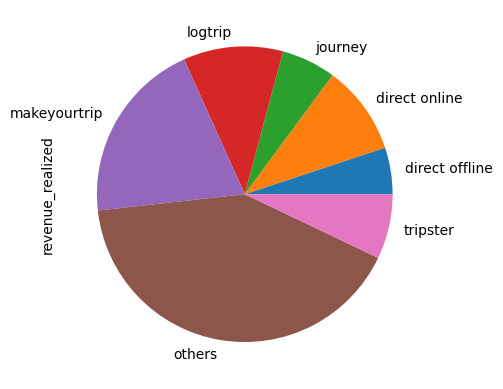

In [95]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")